# Data Science z 3.10. Detekcja obiektów
## 🇬🇧 Data Science with Python 3.10. Object detection
#### 👨‍🏫 PhD, M.Sc. Psych., M.Sc. IT, Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do analizy danych. Jeżeli widoczny będzie błąd, to konieczne jest zainstalowanie stosowanej biblioteki w danym środowisku - wwchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (np. pip install detecto). Aby uruchomić ten notatnik należy skorzystać z Google Colab lub ze środowiska lokalnego.

In [ ]:
!pip install detecto
# biblioteka, która będzie nam potrzebna do wytrenowania modelu

import torch
import matplotlib.pyplot as plt
import numpy as np
import os

from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Badanie')
# łączymy się z dyskiem google

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.Przygotowanie danych
#### 🇬🇧 Data preparation

In [7]:
custom_transforms = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize(900),
                    transforms.RandomHorizontalFlip(0.5),
                    transforms.ColorJitter(saturation=0.2),
                    transforms.ToTensor(),
                    utils.normalize_transform(),
])
# w tym miejscu określamy parametry zdjęć, na których będziemy pracować

### 3.Trenowanie modelu
#### 🇬🇧 Model training

In [22]:
#używając labelimg taggujemy zdjęcia
Train_dataset=core.Dataset('/content/drive/My Drive/Badanie/Train', transform=custom_transforms)
Test_dataset = core.Dataset('/content/drive/My Drive/Badanie/Test')
# ścieżki do folderów ze zdjęciami treningowymi i testowymi
loader=core.DataLoader(Train_dataset, batch_size=2, shuffle=True)
model = core.Model(["person_mask"]) # określamy ile mamy nazw obiektów oraz wpisujemy ich nazwy
losses = model.fit(loader, Test_dataset, epochs=10, lr_step_size=5, learning_rate=0.001, verbose=True) # przy 3 epokach model wytrenował się na odnajdywanie rąk

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.55it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:00<00:00,  5.06it/s]


Loss: 0.4442169666290283
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.62it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.88it/s]


Loss: 0.39017449617385863
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.58it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.91it/s]


Loss: 0.3317491769790649
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:08<00:00,  1.48it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


Loss: 0.2795365542173386
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.54it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:00<00:00,  5.10it/s]


Loss: 0.2574079841375351
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.55it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.97it/s]


Loss: 0.26110667586326597
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.50it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.82it/s]


Loss: 0.25073269605636594
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.57it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.78it/s]


Loss: 0.24685705304145814
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.55it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.75it/s]


Loss: 0.25560571551322936
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.54it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

Loss: 0.24813781082630157


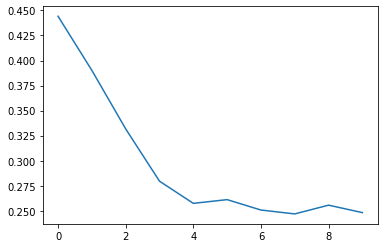

In [23]:
plt.plot(losses)
plt.show()

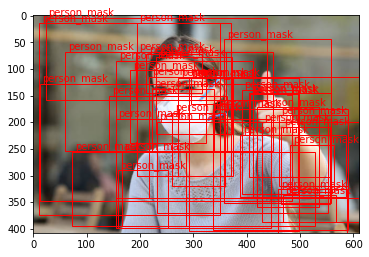

In [24]:
image = utils.read_image("/content/drive/My Drive/Badanie/test1.jpg") 
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

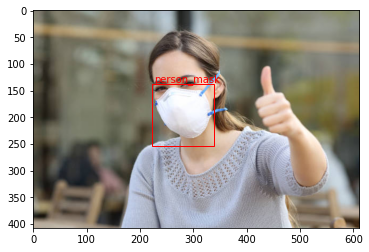

In [26]:
thresh=0.35
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

### 📚 Zadanie
Stwórz model do identyfikacji maseczek. W folderze nie ma dużo zdjęć, dlatego nasz model nie będzie najlepszy (najdłuższą częścią jest etap pozyskiwania i przygotowywania danych), ale prześledzimy proces powstawania modelu detekcji obiektów. Przygotuj odpowiednie oznaczenia (wraz z plikami .xml) za pomocą rectlabel (na macOS) lub labelimg (Windows). Użyj kodu wykorzystanego w czasie zajęć do wytrenowania modelu i sprawdź jego poprawność na tym zdjęciu - https://img.etimg.com/thumb/msid-75574036,width-650,imgsize-622136,,resizemode-4,quality-100/mask_istock.jpg
#### Create the model to identify the masks. There are not many photos in the dataset, so our model will not be the best (the longest part is the data acquisition and preparation stage), but we will be able to see the process of creating the object detection model. Prepare the appropriate .xml files using rectlabel (on macOS) or labelimg (Windows). Train the model and check it using this photo - https://img.etimg.com/thumb/msid-75574036,width-650,imgsize-622136,,resizemode-4,quality-100/mask_istock.jpg